In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer , scale, LabelEncoder, StandardScaler, LabelBinarizer, MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import cv2
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from tensorflow.keras.callbacks import ModelCheckpoint  # Réimporte la classe au cas où elle a été écrasée
from dataVisualisation import viewData, viewDataDistribution

Type de data : <class 'dict'>
{
    "Images\\frame_0000.jpg": {
        "landmarks": [
            [
                0.4083505868911743,
                0.2916416823863983,
                -0.13258647918701172,
                0.9999597072601318
            ],
            [
                0.404127299785614,
                0.2758488357067108,
                -0.11154080182313919,
                0.9999176263809204
            ],
            [
                0.40353408455848694,
                0.2755012512207031,
         
Nombre total d'images : 1399
Répartition des labels :
blocage_gauche: 243 images
coup_de_poing_droit: 513 images
coup_de_poing_gauche: 512 images
blocage_droit: 131 images


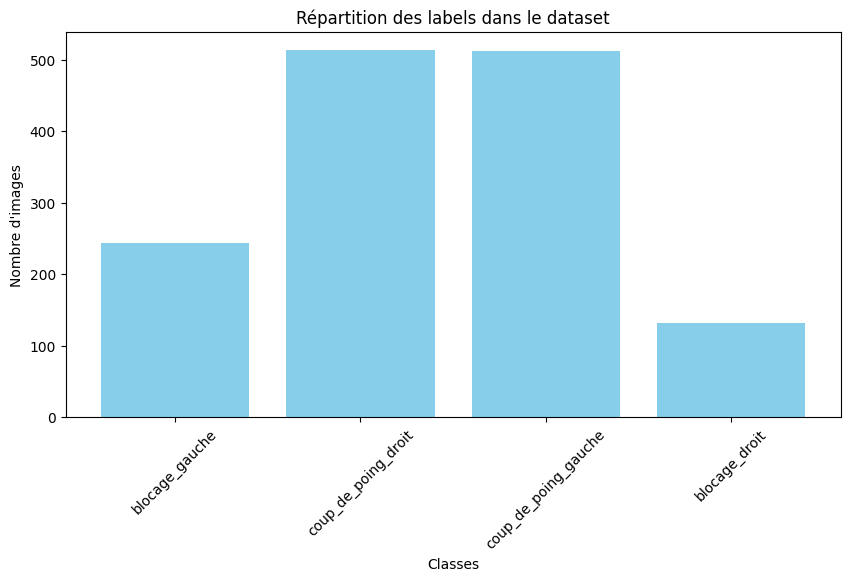

In [2]:
datapath = "dataSet"
viewData(datapath)
viewDataDistribution(datapath)

In [3]:
datapath = 'dataSet'

In [7]:
with open(datapath, "r") as f:
    data = json.load(f)

all_features = []
all_labels = []

for image_name, infos in data.items():
    landmarks = infos["landmarks"]
    label = infos["label"]

    all_features.append(np.array(landmarks).flatten()) # transform to a 1D vector
    all_labels.append(label)



train_features, test_features, train_label, test_label = train_test_split(
    all_features,all_labels,test_size=0.3,random_state=42,stratify=all_labels
)

lb = LabelBinarizer()
y_train = lb.fit_transform(train_label)
y_test = lb.transform(test_label)

X_train = np.array(train_features)
X_test = np.array(test_features)

scaler = MinMaxScaler()

x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)


In [5]:
print(y_train[:10])  # Vérifie combien de classes il y a

[[0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 1 0]]


In [8]:
# Vérifions que les labels sont bien entre 0 et 1 =>

print(np.unique(y_train))
print(np.unique(y_test)) 

[0 1]
[0 1]


In [9]:
#Building the MLP model =>
model = Sequential([
    Dense(128, activation='relu',input_shape=(132,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(len(lb.classes_), activation='softmax')
])

# Model compilation =>
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resume
model.summary()

/Users/djibrildahoub/Documents/cours/2024_2025/S2/IOT/projetAmi/ammiEnv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,492 (107.39 KB)

 Trainable params: 27,492 (107.39 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
checkpoint_callback = ModelCheckpoint(
    filepath="modelMLPTest.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [13]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[checkpoint_callback])

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3155 - loss: 1.3850 - val_accuracy: 0.4119 - val_loss: 1.2583
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4071 - loss: 1.2509 - val_accuracy: 0.4405 - val_loss: 1.2348
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4140 - loss: 1.2333 - val_accuracy: 0.4429 - val_loss: 1.1973
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4419 - loss: 1.2100 - val_accuracy: 0.4500 - val_loss: 1.1850
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4785 - loss: 1.2033 - val_accuracy: 0.4643 - val_loss: 1.1613
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4995 - loss: 1.1701 - val_accuracy: 0.5071 - val_loss: 1.1524
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4783 - loss: 1.1499 - val_accuracy: 0.4857 - val_loss: 1.1251
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4982 - loss: 1.1431 - val_accuracy: 0.5214 - val_loss

## Benchmark

In [14]:
from tensorflow.keras.models import load_model

# Charger le meilleur modèle sauvegardé
best_model = load_model("modelMLP.keras")

# Évaluer le modèle sur les données de test2
test_loss, test_accuracy = best_model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy (best model):", test_accuracy)

Test Accuracy (best model): 0.7333333492279053


Text(0.5, 1.0, 'Évolution de la perte')

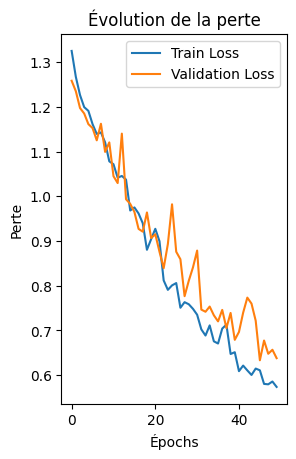

In [15]:
# Courbe de la perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Épochs")
plt.ylabel("Perte")
plt.legend()
plt.title("Évolution de la perte")

Text(0.5, 1.0, 'Évolution de la précision')

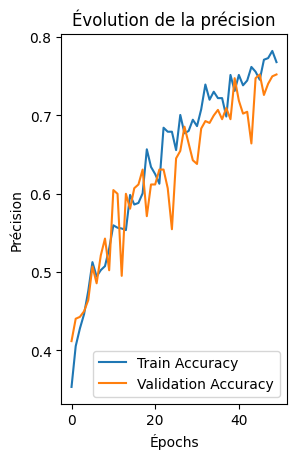

In [16]:

# Courbe de la précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Épochs")
plt.ylabel("Précision")
plt.legend()
plt.title("Évolution de la précision")

In [21]:
import time
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = load_model("modelMLPTest.keras")

# Prédictions du modèle
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calcul des métriques
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.7524
Precision: 0.7552
Recall: 0.7524
F1-score: 0.7521


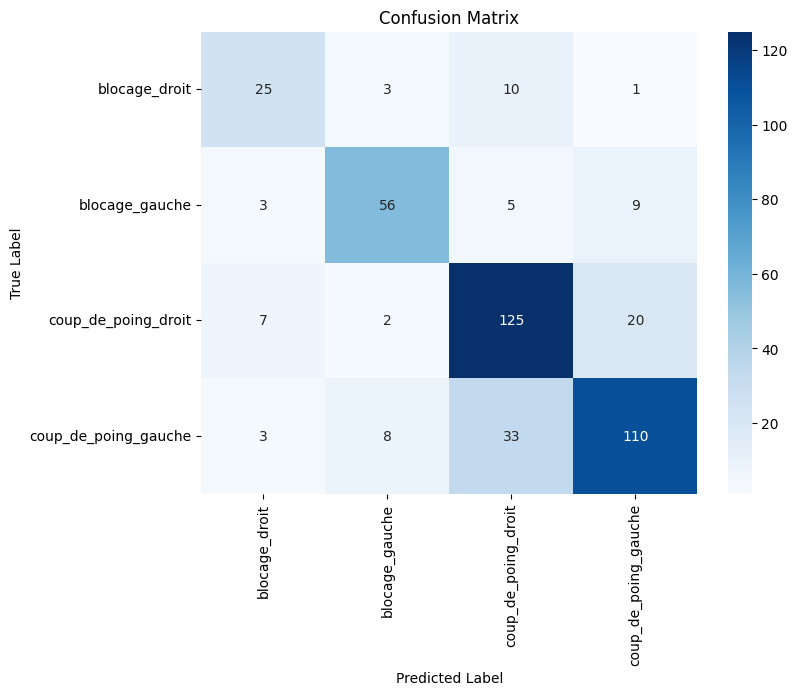

In [22]:
class_names = lb.classes_
# Matrice de confusion
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [19]:
import time

# Mesurer le temps d'inférence pour une seule image
start_time = time.time()
model.predict(x_test[0:1])  # Prédire une seule image
end_time = time.time()
print(f"Temps d'inférence pour une image : {(end_time - start_time) * 1000:.2f} ms")

# Mesurer le temps d'inférence pour l'ensemble du dataset
start_time = time.time()
model.predict(x_test)  # Prédire toutes les images
end_time = time.time()
print(f"Temps d'inférence pour {len(x_test)} images : {end_time - start_time:.2f} s")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Temps d'inférence pour une image : 61.35 ms
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Temps d'inférence pour 420 images : 0.06 s


In [20]:
import psutil
import os

# Mesurer l'utilisation de la mémoire
process = psutil.Process(os.getpid())
print(f"Utilisation de la mémoire : {process.memory_info().rss / 1024 ** 2:.2f} MB")

# Mesurer l'utilisation du CPU
print(f"Utilisation du CPU : {process.cpu_percent(interval=1.0)} %")

Utilisation de la mémoire : 585.00 MB
Utilisation du CPU : 0.4 %
